In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sales=pd.read_csv("C:/Users/rozar/Documents/csv/Tractor-Sales.csv")
sales

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [3]:

sales.rename(columns={'Number of Tractor Sold':'Sale'},inplace=True)
sales=pd.DataFrame(sales.iloc[:,1])
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales))
sales['Date']=dates
sales.set_index("Date",inplace=True)

In [4]:
sales

,Sale
Date,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203
...,...
2014-08-01,848
2014-09-01,640
2014-10-01,581


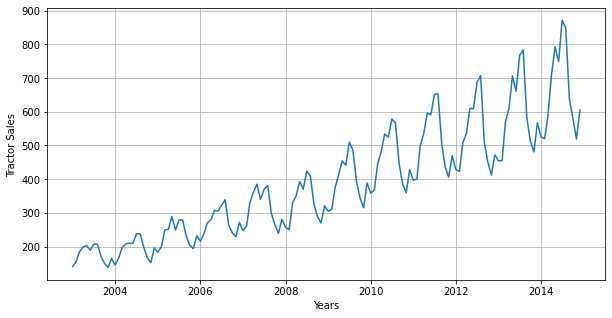

In [5]:
sales_ts=sales['Sale']
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.grid()

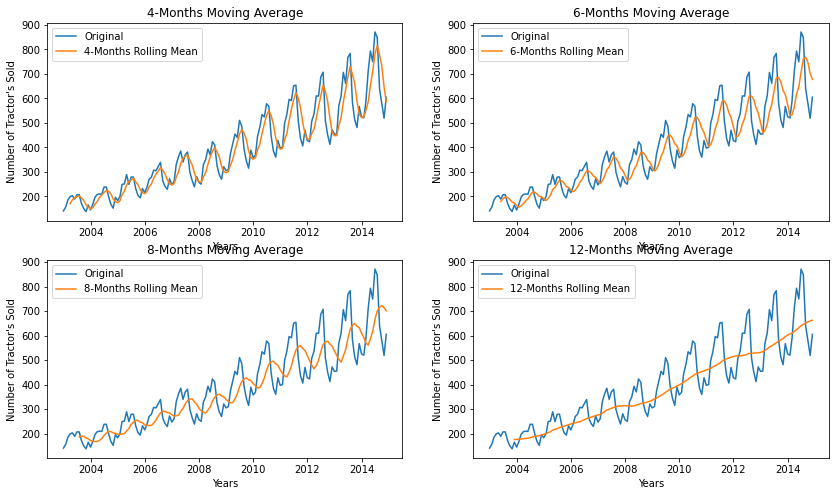

In [6]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.show()

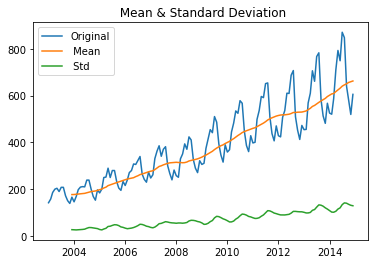

In [9]:
dmean = sales_ts.rolling(window=12).mean()
dstd = sales_ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(dmean, label=' Mean')
std = plt.plot(dstd, label = ' Std')
plt.legend(loc='best')
plt.title(' Mean & Standard Deviation')
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts, autolag='AIC')
dfop = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfop['Critical Value (%s)'%key] = value
print(dfop)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


<AxesSubplot:xlabel='Month'>

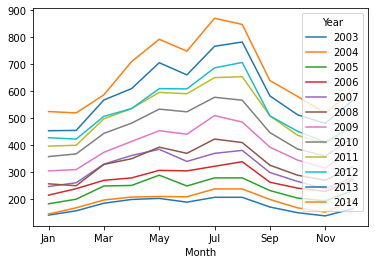

In [11]:
import  calendar
m=dates.month.copy()
m=[i for i in map(lambda x: calendar.month_abbr[x],m)]
y=dates.year.copy()
sales['Month']=m
sales['Year']=y
monthly_sales=sales.pivot_table(values='Sale',index='Month',columns='Year')
monthly_sales=monthly_sales.reindex(index=m[:12])

monthly_sales.plot()

<AxesSubplot:>

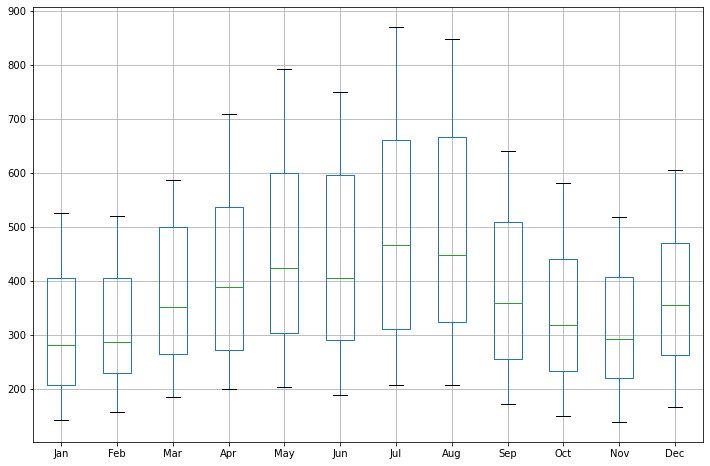

In [12]:
yearly_sales=sales.pivot_table(values='Sale',columns='Month',index="Year")
yearly_sales = yearly_sales[m[:12]]
plt.figure(figsize=(12,8))
yearly_sales.boxplot()

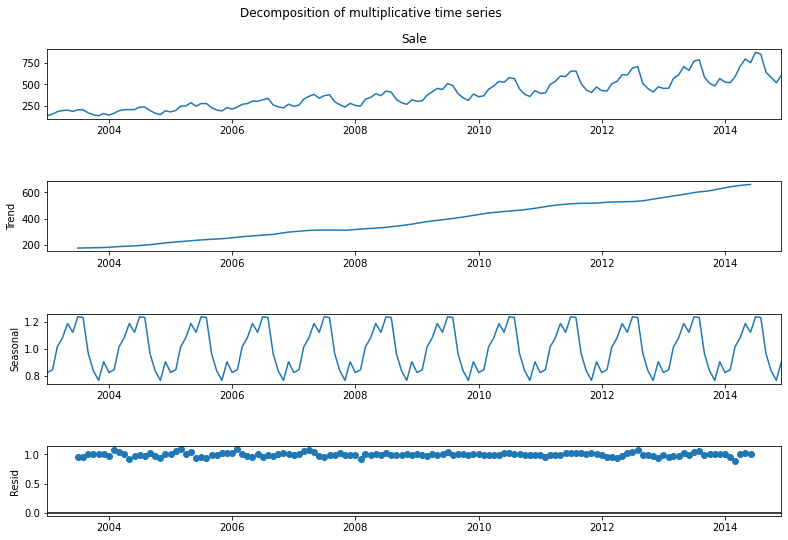

In [13]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
decomposition = smt.seasonal_decompose(sales_ts, model='multiplicative')
fig = decomposition.plot()
plt.tight_layout()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

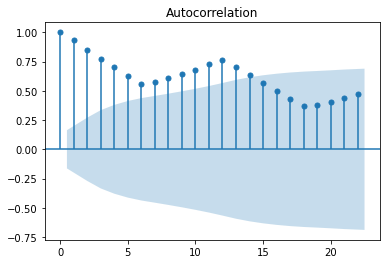

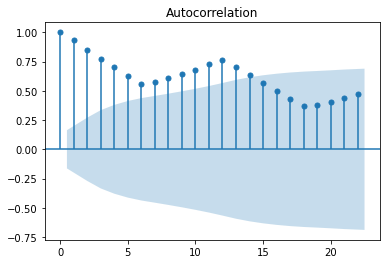

In [14]:
smt.graphics.plot_acf(sales_ts)

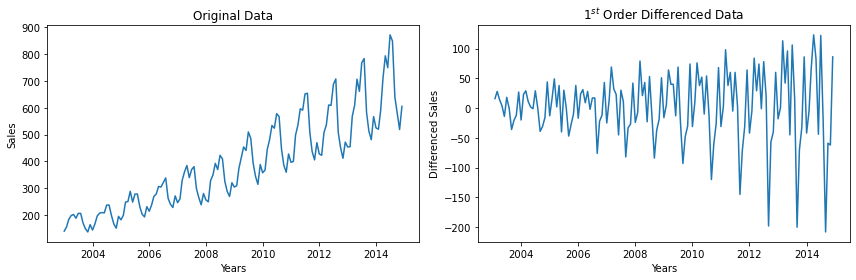

In [15]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
axes[0].plot(sales.index, sales['Sale'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")
axes[1].plot(sales.index, sales['Sale'].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Constant Variance Time Series')

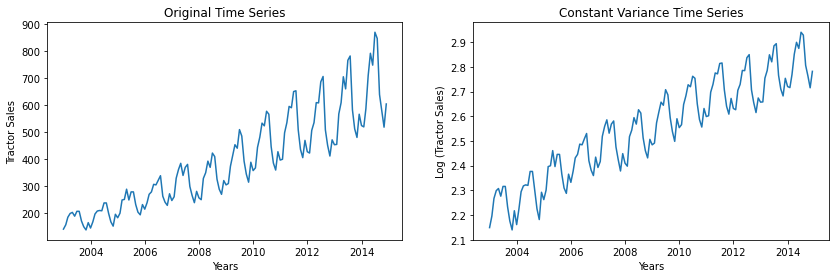

In [16]:
fig,axes=plt.subplots(1,2,sharey=False,sharex=False)
fig.set_figheight(4)
fig.set_figwidth(14)
axes[0].plot(sales_ts)
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Tractor Sales")
axes[0].set_title("Original Time Series")
axes[1].plot(np.log10(sales_ts))
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Log (Tractor Sales)')
axes[1].set_title("Constant Variance Time Series")

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

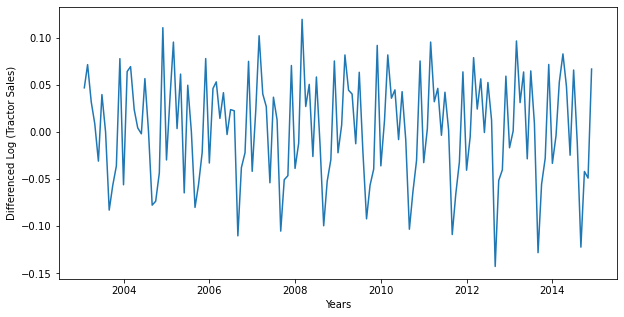

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [18]:
sales_ts_log_diff = np.log10(sales_ts).diff(periods=1)
sales_ts_log_diff.dropna(inplace=True)

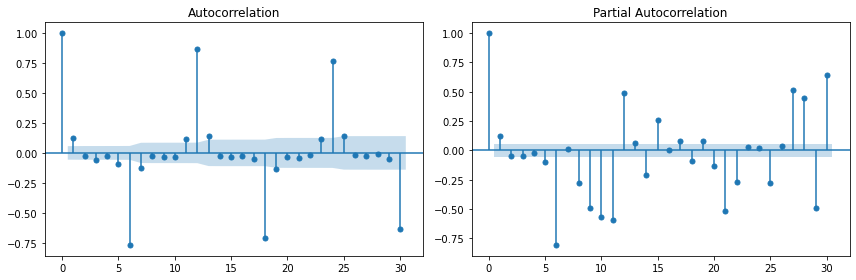

In [19]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [36]:
conda install -c saravji pmdarima

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rozar\anaconda3

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39haa95532_0         888 KB
    pmdarima-1.8.5             |   py39h2bbff1b_0         528 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  pmdarima           pkgs/main/win-64::pmdarima-1.8.5-py39h2bbff1b_0

The following packages will be UPDATED:

  conda                               4.10.3-py39haa95532_0 --> 22.9.0-py39haa95532_0




conda-22.9.0         | 888 KB    |            |   0% 
conda-22.9.0         | 888 KB    | 1          |   2% 
conda-22.9.0         | 888 KB    | #########1 |  92% 
conda-22.9.0         | 888 KB   

In [20]:
from pmdarima import auto_arima
sales_ts_log=np.log10(sales_ts)
model = auto_arima(sales_ts_log, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,information_criterion='aic' ,
                           stepwise=True)
print("best aic: ",model.aic())
print("best order: ",model.order)
print("best seasonal order: ",model.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-701.106, Time=1.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-653.884, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-694.785, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-702.769, Time=0.93 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-669.792, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-700.620, Time=0.46 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-701.329, Time=1.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-697.107, Time=0.36 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-699.291, Time=0.95 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-686.399, Time=0.44 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-700.921, Time=1.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-701.049, Time=0.63 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-698.618, Time=0.58 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-700.794, Time=0.82 sec

Best model:  ARIMA

In [21]:
order=model.order
seasonal_order=model.seasonal_order

In [22]:
import statsmodels.api as sm
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(0,1,1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
results=best_model.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

C:\Users\rozar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\rozar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Sale   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 354.384
Date:                            Thu, 01 Jun 2023   AIC                           -702.769
Time:                                    16:57:02   BIC                           -694.143
Sample:                                01-01-2003   HQIC                          -699.264
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4157      0.073     -5.727      0.000      -0.558      -0.273
ma.S.L12      -0.5494      0.096   

In [23]:
pred=results.predict(start=pd.to_datetime('2012-01-01'),end=pd.to_datetime('2014-12-01'),dynamic=True)


C:\Users\rozar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


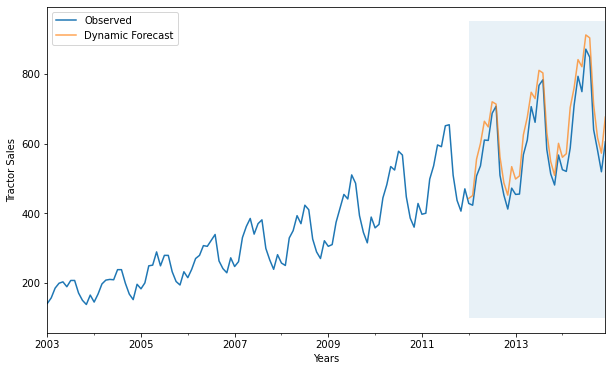

In [24]:
axis = sales_ts.plot(label='Observed', figsize=(10, 6))
np.power(10, pred).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [25]:
pred
actual = sales_ts_log['2012-01-01':]

# Compute the mean square error
mse = ((10**pred-10**actual) ** 2).mean()
rmse=np.sqrt(mse)

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 4)))

The Mean Squared Error of our forecasts is 2642.9888
The Root Mean Squared Error of our forecasts is 51.41


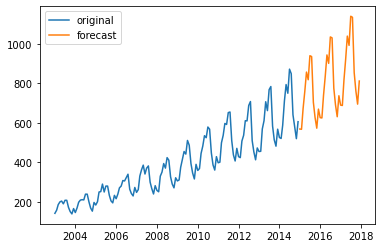

In [26]:
forecast=results.forecast(steps=36)

idx = pd.date_range(sales_ts.index[-1], periods=36, freq='MS')
forecast=10**forecast
plt.plot(sales_ts,label='original')
plt.plot(forecast,label='forecast')
plt.legend()

In [27]:
forecast_95 = results.get_forecast(steps=36, alpha=0.05)
forecast_mean=10**forecast_95.predicted_mean
forecast_ci=10**forecast_95.conf_int()
forecast=forecast_ci.copy()
forecast['sale']=forecast_mean
forecast.head()

,lower Sale,upper Sale,sale
2015-01-01,528.575814,610.168237,567.908595
2015-02-01,521.366153,615.667078,566.558008
2015-03-01,611.104229,736.182727,670.734208
2015-04-01,685.435706,840.739282,759.126290
2015-05-01,766.737221,956.156698,856.224813


Text(0, 0.5, 'Tractor Sales')

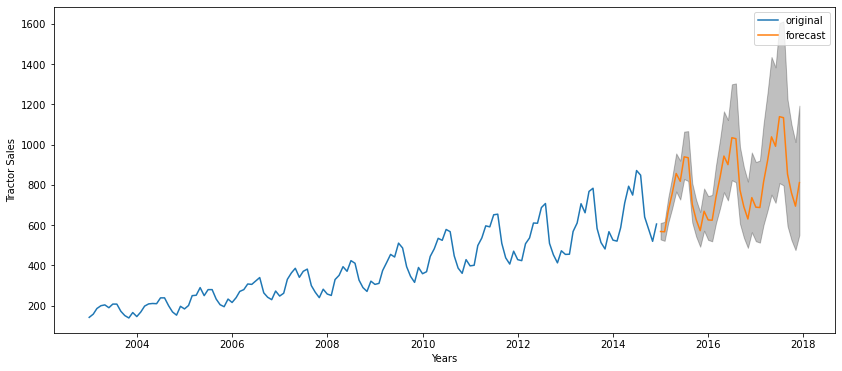

In [28]:
idx = pd.date_range(sales_ts.index[-1], periods=36, freq='MS')
plt.figure(figsize=(14,6))
plt.plot(sales_ts,label='original')
plt.plot(forecast['sale'],label='forecast')
plt.fill_between(forecast.index,forecast['lower Sale'],forecast['upper Sale'],color='k',alpha=0.25)
plt.legend()
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

C:\Users\rozar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


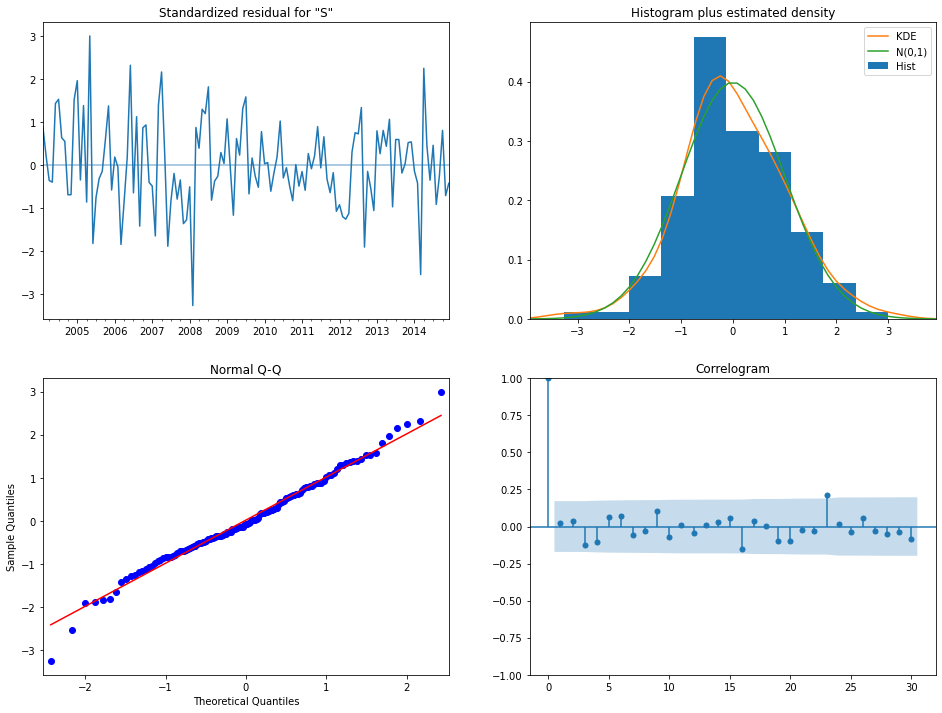

In [29]:
results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()